# ML квалификация

Сообщества ВКонтакте могут принадлежать одной из нескольких заранее заданных категорий. Но даже среди спортивных сообществ есть достаточно сильное разделение по тематикам! Одни и те же авторы могут писать только об одном виде спорта или сразу о большом количестве.
По заданному набору постов определите тематику — какой именно вид спорта обсуждается в выбранном сообществе?

Вот список доступных категорий:
- athletics,
- autosport,
- basketball,
- boardgames,
- esport,
- extreme,
- football,
- hockey,
- martial_arts,
- motosport,
- tennis,
- volleyball,
- winter_sport.

Обратите внимание, что в этой задаче вас ждёт нестандартная метрика:
- За каждый правильный ответ вы получите +1.
- За каждый неправильный ответ вы получите −1.

Таким образом, вы можете отправлять решения, в которых категория отмечена не для каждого сообщества.


## Загрузка датасета

In [ ]:
# Монтирует google disk в colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

url = os.chdir(r"/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/vk vup")
os.getcwd()

'/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/vk vup'

In [ ]:
os.listdir()

['sample_submission.csv', 'train.csv', 'test.csv', 'catboost_info']

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')
print(f'Sample submission shape: {sample_submission.shape}')

Train shape: (38740, 3)
Test shape: (26260, 2)
Sample submission shape: (2626, 2)


In [ ]:
train.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [ ]:
test.head()

,oid,text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...
1,452466036,Естественное восстановление после тяжелой трен...
2,161038103,Тема нарядов продолжается Одна из британских ж...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...


In [ ]:
sample_submission.head()

,oid,category
0,1622114,athletics
1,1663817,autosport
2,3174332,basketball
3,3469228,extreme
4,3905302,boardgames


## Исследование данных

In [ ]:
train.loc[10, 'text']

'Хьюстон рассматривают возможность сохранения и использования Бобана Марьяновича Бобан был переведен в Хьюстон из Далласа в рамках сделки по приобретению Кристиана Вуда но сербский центровой действительно может сыграть весьма важную роль в новой команде. Согласно Hotokenoid Chrontokenoid Хьюстон взвешивают сохранение Марьяновича в составе и хотят сделать его частью основной ротации. Тем временем ожидается что все остальные игроки которые были приобретены из Далласа в рамках сделки с Вудом Маркиз Крисс Стерлинг Браун и Трей Берк покинут команду.'

In [ ]:
train.loc[0, 'text']

'Волшебные фото Виктория Поплавская ЕвгенияМедведева Evgentokenoid'

In [ ]:
train['category'].value_counts()

autosport       3160
extreme         3110
martial_arts    3050
motosport       3030
boardgames      3020
tennis          3000
esport          2990
athletics       2970
hockey          2950
volleyball      2950
football        2860
basketball      2850
winter_sport    2800
Name: category, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


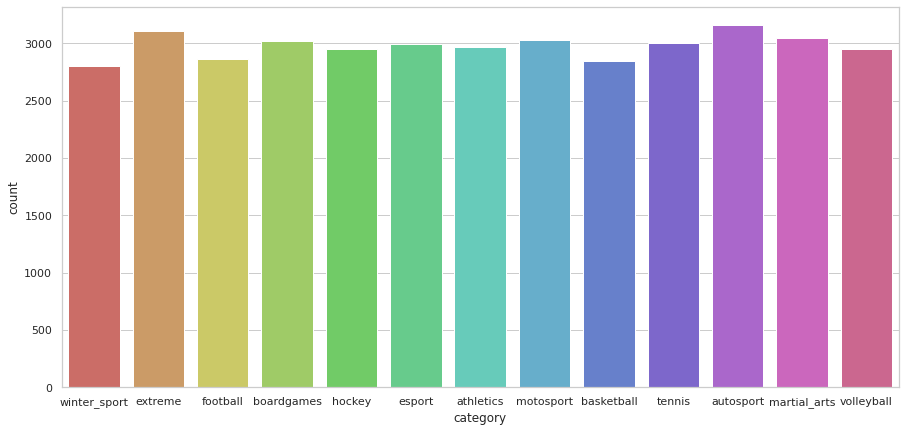

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots(figsize=(15, 7))

sns.countplot(train['category'], ax=ax, palette='hls')
fig.show()

In [ ]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 154 kB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 41 kB 127 kB/s 
     |████████████████████████████████| 8.2 MB 57.2 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26118 sha256=97803d4a90a55e8c0e52a731606ea05af49f47aa041fb35a2a38f10f88cb4d5b
  Stored in directory: /root/.cache/pip/wheels/45/23/de/5789a92962483fd33cb06674792b9697c1b3766d7c7742830e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=8703b826d3cb63b12b52e1d8acc67b49b6f584bb4d9b6c29f31ebec9098ad384
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built intervaltree docopt
  Attempting uninstall: intervaltree
    Fou

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    LOC,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

In [ ]:
text = '''Хьюстон рассматривают возможность сохранения и использования Бобана Марьяновича Бобан был переведен в Хьюстон \
из Далласа в рамках сделки по приобретению Кристиана Вуда но сербский центровой действительно может сыграть весьма \
важную роль в новой команде. Согласно Hotokenoid Chrontokenoid Хьюстон взвешивают сохранение Марьяновича в составе и \
хотят сделать его частью основной ротации. Тем временем ожидается что все остальные игроки которые были приобретены из Далласа \
в рамках сделки с Вудом Маркиз Крисс Стерлинг Браун и Трей Берк покинут команду. 27.09.2022 года произашло данное событий.'''
text

'Хьюстон рассматривают возможность сохранения и использования Бобана Марьяновича Бобан был переведен в Хьюстон из Далласа в рамках сделки по приобретению Кристиана Вуда но сербский центровой действительно может сыграть весьма важную роль в новой команде. Согласно Hotokenoid Chrontokenoid Хьюстон взвешивают сохранение Марьяновича в составе и хотят сделать его частью основной ротации. Тем временем ожидается что все остальные игроки которые были приобретены из Далласа в рамках сделки с Вудом Маркиз Крисс Стерлинг Браун и Трей Берк покинут команду. 27.09.2022 года произашло данное событий.'

In [ ]:
doc = Doc(text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
doc.tag_ner(ner_tagger)

In [ ]:
doc.tag_morph(morph_tagger)

In [ ]:
display(doc.tokens)

[DocToken(stop=7, text='Хьюстон', id='1_1', head_id='1_2', rel='nsubj', pos='PROPN', feats=<Inan,Nom,Masc,Sing>),
 DocToken(start=8, stop=21, text='рассматривают', id='1_2', head_id='1_0', rel='root', pos='VERB', feats=<Imp,Ind,Plur,3,Pres,Fin,Act>),
 DocToken(start=22, stop=33, text='возможность', id='1_3', head_id='1_2', rel='obj', pos='NOUN', feats=<Inan,Acc,Fem,Sing>),
 DocToken(start=34, stop=44, text='сохранения', id='1_4', head_id='1_3', rel='nmod', pos='NOUN', feats=<Inan,Gen,Neut,Sing>),
 DocToken(start=45, stop=46, text='и', id='1_5', head_id='1_6', rel='cc', pos='CCONJ'),
 DocToken(start=47, stop=60, text='использования', id='1_6', head_id='1_4', rel='conj', pos='NOUN', feats=<Inan,Gen,Neut,Sing>),
 DocToken(start=61, stop=67, text='Бобана', id='1_7', head_id='1_20', rel='nmod', pos='PROPN', feats=<Inan,Gen,Masc,Sing>),
 DocToken(start=68, stop=79, text='Марьяновича', id='1_8', head_id='1_7', rel='flat:name', pos='PROPN', feats=<Anim,Nom,Masc,Sing>),
 DocToken(start=80, stop

In [ ]:
display(doc.sents)

[DocSent(stop=253, text='Хьюстон рассматривают возможность сохранения и ис..., tokens=[...], spans=[...]),
 DocSent(start=254, stop=384, text='Согласно Hotokenoid Chrontokenoid Хьюстон взвешив..., tokens=[...], spans=[...]),
 DocSent(start=385, stop=549, text='Тем временем ожидается что все остальные игроки к..., tokens=[...], spans=[...]),
 DocSent(start=550, stop=591, text='27.09.2022 года произашло данное событий.', tokens=[...])]

In [ ]:
doc.tag_morph(morph_tagger)
display(doc.tokens[:5])

[DocToken(stop=7, text='Хьюстон', id='1_1', head_id='1_2', rel='nsubj', pos='PROPN', feats=<Inan,Nom,Masc,Sing>),
 DocToken(start=8, stop=21, text='рассматривают', id='1_2', head_id='1_0', rel='root', pos='VERB', feats=<Imp,Ind,Plur,3,Pres,Fin,Act>),
 DocToken(start=22, stop=33, text='возможность', id='1_3', head_id='1_2', rel='obj', pos='NOUN', feats=<Inan,Acc,Fem,Sing>),
 DocToken(start=34, stop=44, text='сохранения', id='1_4', head_id='1_3', rel='nmod', pos='NOUN', feats=<Inan,Gen,Neut,Sing>),
 DocToken(start=45, stop=46, text='и', id='1_5', head_id='1_6', rel='cc', pos='CCONJ')]

In [ ]:
doc.spans

[DocSpan(stop=7, type='LOC', text='Хьюстон', tokens=[...]),
 DocSpan(start=61, stop=85, type='PER', text='Бобана Марьяновича Бобан', tokens=[...]),
 DocSpan(start=102, stop=109, type='LOC', text='Хьюстон', tokens=[...]),
 DocSpan(start=113, stop=120, type='LOC', text='Далласа', tokens=[...]),
 DocSpan(start=153, stop=167, type='PER', text='Кристиана Вуда', tokens=[...]),
 DocSpan(start=263, stop=287, type='ORG', text='Hotokenoid Chrontokenoid', tokens=[...]),
 DocSpan(start=288, stop=295, type='PER', text='Хьюстон', tokens=[...]),
 DocSpan(start=318, stop=329, type='PER', text='Марьяновича', tokens=[...]),
 DocSpan(start=461, stop=468, type='LOC', text='Далласа', tokens=[...]),
 DocSpan(start=487, stop=520, type='PER', text='Вудом Маркиз Крисс Стерлинг Браун', tokens=[...]),
 DocSpan(start=523, stop=532, type='PER', text='Трей Берк', tokens=[...])]

In [ ]:
matches = dates_extractor(text)
facts = [i.fact.as_json for i in matches]
facts

[OrderedDict([('year', 2022), ('month', 9), ('day', 27)])]

In [ ]:
for f in facts:
    print(f"{f.get('day')}.{f.get('month')}.{f.get('year')}")

27.9.2022


In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    PER,
    NamesExtractor,
    NewsNERTagger,
    NewsEmbedding,
    Doc
)

emb = NewsEmbedding()
segmenter = Segmenter()
morph_vocab = MorphVocab()
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

doc = Doc(text)

doc.segment(segmenter)

doc.tag_ner(ner_tagger)

for span in doc.spans:
    span.normalize(morph_vocab)
{_.text: _.normal for _ in doc.spans}

for span in doc.spans:
    if span.type == PER:
        span.extract_fact(names_extractor)

{_.normal: _.fact.as_dict for _ in doc.spans if _.fact}

{'Бобана Марьяновича Бобан': {'last': 'Бобана'},
 'Кристиана Вуда': {'first': 'Кристиана', 'last': 'Вуда'},
 'Хьюстон': {'last': 'Хьюстон'},
 'Вудом Маркиз Крисс Стерлинг Браун': {'first': 'Крисс', 'last': 'Маркиз'},
 'Трей Берк': {'first': 'Трей', 'last': 'Берк'}}

In [ ]:
# doc.parse_syntax(syntax_parser)
# print(doc.tokens[:5])
doc.sents[0].syntax.print()

[DocToken(stop=7, text='Хьюстон', id='1_1', head_id='1_2', rel='nsubj'), DocToken(start=8, stop=21, text='рассматривают', id='1_2', head_id='1_0', rel='root'), DocToken(start=22, stop=33, text='возможность', id='1_3', head_id='1_2', rel='obj'), DocToken(start=34, stop=44, text='сохранения', id='1_4', head_id='1_3', rel='nmod'), DocToken(start=45, stop=46, text='и', id='1_5', head_id='1_6', rel='cc')]
            ┌► Хьюстон       nsubj
┌─┌───────┌─└─ рассматривают 
│ │       └►┌─ возможность   obj
│ │       ┌─└► сохранения    nmod
│ │       │ ┌► и             cc
│ │       └►└─ использования conj
│ │ ┌──────►┌─ Бобана        nmod
│ │ │     ┌─└► Марьяновича   flat:name
│ │ │     └──► Бобан         flat:name
│ │ │       ┌► был           aux:pass
│ │ │ ┌─┌─┌─└─ переведен     
│ │ │ │ │ │ ┌► в             case
│ │ │ │ │ └►└─ Хьюстон       obl
│ │ │ │ │   ┌► из            case
│ │ │ │ └──►└─ Далласа       obl
│ │ │ │     ┌► в             case
│ │ │ └──►┌─└─ рамках        obl
│ │ │   ┌─└──► сд

In [ ]:
from natasha import NewsNERTagger

ner_tagger = NewsNERTagger(emb)
doc.tag_ner(ner_tagger)

doc.ner.print()

Хьюстон рассматривают возможность сохранения и использования Бобана 
LOC────                                                      PER────
Марьяновича Бобан был переведен в Хьюстон из Далласа в рамках сделки 
─────────────────                 LOC────    LOC────                 
по приобретению Кристиана Вуда но сербский центровой действительно 
                PER───────────                                     
может сыграть весьма важную роль в новой команде. Согласно Hotokenoid 
                                                           ORG────────
Chrontokenoid Хьюстон взвешивают сохранение Марьяновича в составе и 
───────────── PER────                       PER────────             
хотят сделать его частью основной ротации. Тем временем ожидается что 
все остальные игроки которые были приобретены из Далласа в рамках 
                                                 LOC────          
сделки с Вудом Маркиз Крисс Стерлинг Браун и Трей Берк покинут 
         PER─────────────────────────

In [ ]:
tmp = train.loc[0:5,:]
tmp

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...
5,780575952,boardgames,Северные территории на границе королевства Нал...


In [ ]:
doc.spans

[DocSpan(stop=7, type='LOC', text='Хьюстон', tokens=[...]),
 DocSpan(start=61, stop=85, type='PER', text='Бобана Марьяновича Бобан', tokens=[...]),
 DocSpan(start=102, stop=109, type='LOC', text='Хьюстон', tokens=[...]),
 DocSpan(start=113, stop=120, type='LOC', text='Далласа', tokens=[...]),
 DocSpan(start=153, stop=167, type='PER', text='Кристиана Вуда', tokens=[...]),
 DocSpan(start=263, stop=287, type='ORG', text='Hotokenoid Chrontokenoid', tokens=[...]),
 DocSpan(start=288, stop=295, type='PER', text='Хьюстон', tokens=[...]),
 DocSpan(start=318, stop=329, type='PER', text='Марьяновича', tokens=[...]),
 DocSpan(start=461, stop=468, type='LOC', text='Далласа', tokens=[...]),
 DocSpan(start=487, stop=520, type='PER', text='Вудом Маркиз Крисс Стерлинг Браун', tokens=[...]),
 DocSpan(start=523, stop=532, type='PER', text='Трей Берк', tokens=[...])]

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    PER,
    NamesExtractor,
    NewsNERTagger,
    NewsEmbedding,
    Doc
)

emb = NewsEmbedding()
segmenter = Segmenter()
morph_vocab = MorphVocab()
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

for index, row in tmp.iterrows():
    doc = Doc(row['text'])
    doc.segment(segmenter)

    doc.tag_ner(ner_tagger)

    for span in doc.spans:
        span.normalize(morph_vocab)

    for span in doc.spans:
        if span.type == PER:
            span.extract_fact(names_extractor)

    d = {_.normal: _.fact.as_dict for _ in doc.spans if _.fact}
    tmp['ner'] = str(d.keys()))

dict_keys(['Виктория Поплавская ЕвгенияМедведева Evgentokenoid'])
dict_keys([])
dict_keys(['Доминик Доминатор Гашек', 'Петр Танкист Чех', 'Чех', 'Доминик Гашек', 'Чеху', 'Петр', 'Гилфорд Феникс'])
dict_keys(['Арми Сет', 'Киллтим Касркины', 'Некронов', 'Атилланских', 'Хакушник Лорд Солар'])
dict_keys(['Шестеркин', 'Игорь', 'Каролиной', 'Игорь Шестеркин', 'Шестеркина', 'Игорем Шестеркиным', 'Андерсен', 'Кейнс', 'Сегодня Шестеркин', 'Респект Рейнджерс', 'Обожаю Шестеркина', 'Василевский', 'Каролиной Шестеркин', 'Андреем Василевским'])
dict_keys([])


# Тупое решение в лоб

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
stop_words = list(stopwords.words('russian'))

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ',
             41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ',
             59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ',
             93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

def clean(df, col):
    col_new = 'cleaned_text'
    df[col_new] = df[col].map(lambda x: remove_punct(x))

    for stop_word in stop_words:
        regex_stopword = r"\b" + stop_word + r"\b"
        df[col_new] = df[col_new].str.replace(regex_stopword, '')

    df[col_new] = df[col_new].str.lower()

    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_mini = train.sample(frac=0.2).reset_index(drop=True)
train_mini['category'].value_counts()

autosport       630
boardgames      620
esport          618
extreme         616
motosport       608
athletics       605
hockey          605
volleyball      593
winter_sport    582
martial_arts    579
tennis          573
basketball      566
football        553
Name: category, dtype: int64

In [ ]:
%%time
train_mini = clean(train_mini, 'text')
train_mini

<ipython-input-42-9419b09fed3b>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col_new] = df[col_new].str.replace(regex_stopword, '')


CPU times: user 13.1 s, sys: 8.35 ms, total: 13.1 s
Wall time: 13.8 s


,oid,category,text,cleaned_text
0,271687197,boardgames,Игры для вечеринок правила которых можно объяс...,игры вечеринок правила которых объяснить мен...
1,291264282,volleyball,Сегодня день рождения празднует главный тренер...,сегодня день рождения празднует главный тренер...
2,493641789,athletics,Фигуристка Аня поздравляет всех с наступившим ...,фигуристка аня поздравляет наступившим нг п...
3,717860350,esport,Давайте посмотрим на советы по игре которыми х...,давайте посмотрим советы игре которыми хочет...
4,818387594,autosport,Франко Джиролами стал чемпионом TCR Европа 33 ...,франко джиролами стал чемпионом tcr европа 33 ...
...,...,...,...,...
7743,926571764,boardgames,Внимание 33 Для шахматистов от 1 разряда рейти...,внимание 33 для шахматистов 1 разряда рейтинг...
7744,68708443,football,Когда продал квартиру а Зенит все еще не предл...,когда продал квартиру зенит предложил тебе...
7745,671964543,extreme,С праздником мужики не забывайте поздравить и ...,с праздником мужики забывайте поздравить сво...
7746,320511160,esport,В начале июля Vtokenoid. рro под тегом Otokeno...,в начале июля vtokenoid рro тегом otokenoid ...


In [ ]:
# %%time
# test = clean(test, 'text')
# test

### **Извлечение признаков.**

Для решения этой задачи обычно используются разные классификаторы, которые на вход получают вектора, тензоры или матрицы, описыающие текст.

1. Двоичный вектор (0 - нет слова в текста, 1 - есть слово в тексте)
2. Вещественный вектор (описывает встречаемость слов в тексте с учетом их частотности)
3. N-граммы символов и токенов, словосочетания
4. Плотные вектора слов, предожений, текстов (word embading, text embading)
5. Ядерные методы и графовые методы

In [ ]:
train_mini

,oid,category,text,cleaned_text
0,271687197,boardgames,Игры для вечеринок правила которых можно объяс...,игры вечеринок правила которых объяснить мен...
1,291264282,volleyball,Сегодня день рождения празднует главный тренер...,сегодня день рождения празднует главный тренер...
2,493641789,athletics,Фигуристка Аня поздравляет всех с наступившим ...,фигуристка аня поздравляет наступившим нг п...
3,717860350,esport,Давайте посмотрим на советы по игре которыми х...,давайте посмотрим советы игре которыми хочет...
4,818387594,autosport,Франко Джиролами стал чемпионом TCR Европа 33 ...,франко джиролами стал чемпионом tcr европа 33 ...
...,...,...,...,...
7743,926571764,boardgames,Внимание 33 Для шахматистов от 1 разряда рейти...,внимание 33 для шахматистов 1 разряда рейтинг...
7744,68708443,football,Когда продал квартиру а Зенит все еще не предл...,когда продал квартиру зенит предложил тебе...
7745,671964543,extreme,С праздником мужики не забывайте поздравить и ...,с праздником мужики забывайте поздравить сво...
7746,320511160,esport,В начале июля Vtokenoid. рro под тегом Otokeno...,в начале июля vtokenoid рro тегом otokenoid ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=300)

X = vectorizer.fit_transform(train_mini['cleaned_text'])

bag_of_words = pd.DataFrame(X.toarray(),
                            columns = vectorizer.get_feature_names())

bag_of_words.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,13,14,15,16,...,чемпион,чемпионат,чемпионата,чемпионате,что,этап,этим,это,этому,является
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2),
                             max_features = 800)

# токенезация текста и построение словоря
vectors = vectorizer.fit_transform(train_mini['cleaned_text'])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

tf_idf = pd.DataFrame(denselist, columns=feature_names)

tf_idf.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 4.52 s, sys: 373 ms, total: 4.89 s
Wall time: 5.44 s


,00,00 мск,000,01,02,03,036,04,05,06,...,эта,этап,этапа,этапе,этим,этих,это,этому,является,января
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.2704
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.138238,0.0,0.155161,0.0,0.0,0.074884,0.0,0.0,0.0000


In [ ]:
# %%time
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(ngram_range = (1,2),
#                              max_features = 800)

# # токенезация текста и построение словоря
# vectors = vectorizer.fit_transform(train['cleaned_text'])
# vectors_test = vectorizer.transform(test['cleaned_text'])

# feature_names = vectorizer.get_feature_names()
# dense = vectors.todense()
# denselist = dense.tolist()

# dense_test = vectors_test.todense()
# denselist_test = dense_test.tolist()

# train_df = pd.DataFrame(denselist, columns=feature_names)
# test_df = pd.DataFrame(denselist_test, columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 27.8 s, sys: 2.49 s, total: 30.3 s
Wall time: 30.3 s


In [ ]:
train_df['category'] = train['category']
train_df['oid'] = train['oid']

test_df['oid'] = test['oid']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['category', 'oid']), train_df['category'], test_size = 0.3, random_state = 0)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(27118, 800)
(27118,)
(11622, 800)
(11622,)


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 28 kB/s 


In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)
y_pred = catboost.predict(X_test)

Learning rate set to 0.093631
0:	learn: 2.4681087	total: 3.45s	remaining: 57m 23s
1:	learn: 2.4278529	total: 7.76s	remaining: 1h 4m 32s
2:	learn: 2.3871616	total: 13.9s	remaining: 1h 17m 7s
3:	learn: 2.3528182	total: 20s	remaining: 1h 23m
4:	learn: 2.3205350	total: 24.8s	remaining: 1h 22m 5s
5:	learn: 2.3001267	total: 27.8s	remaining: 1h 16m 42s
6:	learn: 2.2773789	total: 30.8s	remaining: 1h 12m 52s
7:	learn: 2.2579048	total: 34.2s	remaining: 1h 10m 37s
8:	learn: 2.2437090	total: 37.3s	remaining: 1h 8m 23s
9:	learn: 2.2296513	total: 40.4s	remaining: 1h 6m 37s
10:	learn: 2.2127296	total: 43.4s	remaining: 1h 5m 2s
11:	learn: 2.1974153	total: 46.5s	remaining: 1h 3m 45s
12:	learn: 2.1860856	total: 49.6s	remaining: 1h 2m 45s
13:	learn: 2.1739125	total: 52.8s	remaining: 1h 1m 59s
14:	learn: 2.1632720	total: 56s	remaining: 1h 1m 14s
15:	learn: 2.1520478	total: 59.1s	remaining: 1h 31s
16:	learn: 2.1415075	total: 1m 2s	remaining: 59m 55s
17:	learn: 2.1317828	total: 1m 5s	remaining: 59m 17s
18:	

0.5894854586129754


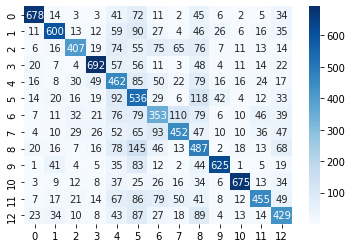

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print(accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap = plt.cm.Blues, fmt='g')

In [ ]:
!pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 1.3 MB/s 
     |████████████████████████████████| 41 kB 119 kB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 8.2 MB 58.7 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26118 sha256=61611cfe9e834a551b29f5dc6ea0a1b8d6afaf6c9029571b8d76d71b36abb14f
  Stored in directory: /root/.cache/pip/wheels/45/23/de/5789a92962483fd33cb06674792b9697c1b3766d7c7742830e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=9de5c05844a9c725b1dd175d84164112febce73037725d4054493c63ba685a96
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built intervaltree docopt
  Attempting uninstall: intervaltree
    Fou

In [ ]:
from natasha import NamesExtractor
from natasha.markup import show_markup, show_json

extractor = NamesExtractor()